# Penguin Groupings

In [2]:
# Importing Required Packages
import os
os.environ["OMP_NUM_THREADS"] = '2'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [4]:
# Basic information about each column
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [5]:
# Descriptive statistics of each numerical column
penguins_df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,332.0,44.021084,5.452462,32.1,39.5,44.7,48.625,59.6
culmen_depth_mm,332.0,17.153012,1.960275,13.1,15.6,17.3,18.700,21.5
flipper_length_mm,332.0,200.975904,14.035971,172.0,190.0,197.0,213.000,231.0
body_mass_g,332.0,4206.475904,806.361278,2700.0,3550.0,4025.0,4781.250,6300.0


## Performing Exploratory Data Analysis

In [7]:
# Check for null values
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

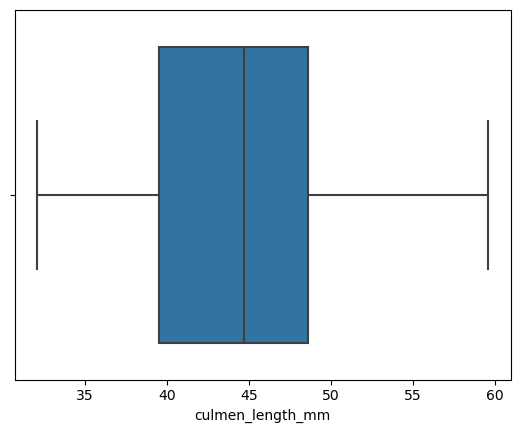

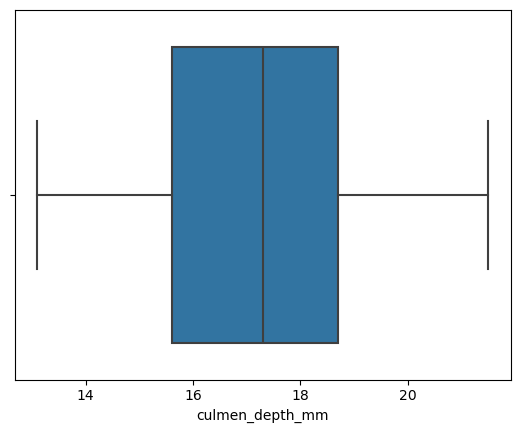

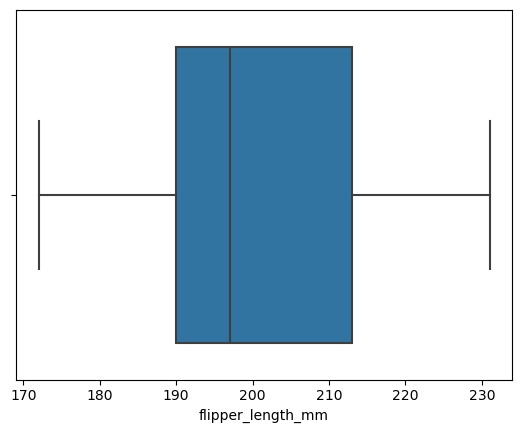

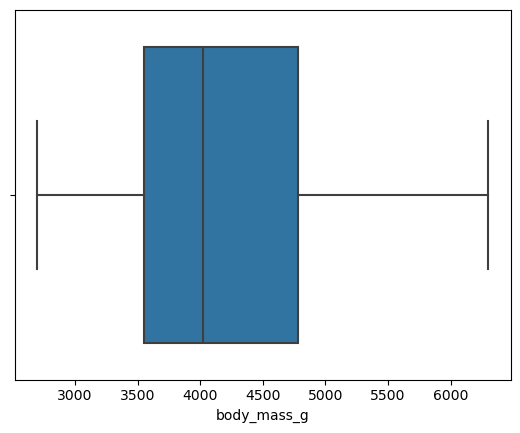

In [8]:
# Check for outliers in each numerical columns
for col in penguins_df.columns[:-1]:
    sns.boxplot(data=penguins_df, x=col)
    plt.show()

## Data Preprocessing

In [10]:
# Get dummies and remove the sex column
penguins = pd.get_dummies(penguins_df, drop_first=True, dtype='int')
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [11]:
# Scaling of the dataset
scale = StandardScaler()
penguins_scaled = scale.fit_transform(penguins)
penguins_scaled

array([[-0.90390586,  0.79035987, -1.42534179, -0.56694801,  0.99399394],
       [-0.83043377,  0.12618674, -1.0685765 , -0.50484747, -1.00604235],
       [-0.68348959,  0.43272819, -0.42639899, -1.18795343, -1.00604235],
       ...,
       [ 1.17168063, -0.74234736,  1.50013355,  1.91707363,  0.99399394],
       [ 0.21654349, -1.20215952,  0.78660298,  1.23396768, -1.00604235],
       [ 1.07984052, -0.53798639,  0.85795603,  1.48236985,  0.99399394]])

## KMeans Cluster Modelling

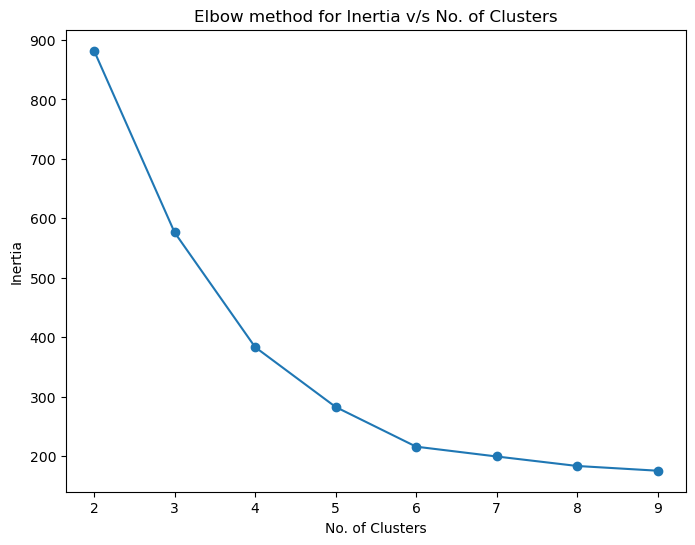

In [13]:
# Initializing KMeans model and hyperparameter tuning
K = range(2,10)
model = []
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=3, random_state=51)
    kmeans.fit(penguins_scaled)
    model.append(kmeans)
    inertia.append(kmeans.inertia_)
    
# Determining optimum K from inertia vs n_clusters plot
plt.figure(figsize=(8,6))
plt.plot(K, inertia, marker='o')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for Inertia v/s No. of Clusters')
plt.xticks(K)
plt.show()

In [14]:
# Setting n_clusters = 5
n_clusters = 5

# Index of n_clusters in the 'K' list
index = K.index(n_clusters)

# Getting model corrosponding to n_clusters from model list and clustering
model_final = model[index]
model_final.fit(penguins_scaled)
labels = model_final.labels_

# Adding the cluster label of each penguin to original dataframe
penguins_df['cluster_label'] = labels
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster_label
0,39.1,18.7,181.0,3750.0,MALE,2
1,39.5,17.4,186.0,3800.0,FEMALE,0
2,40.3,18.0,195.0,3250.0,FEMALE,0
3,36.7,19.3,193.0,3450.0,FEMALE,0
4,39.3,20.6,190.0,3650.0,MALE,2


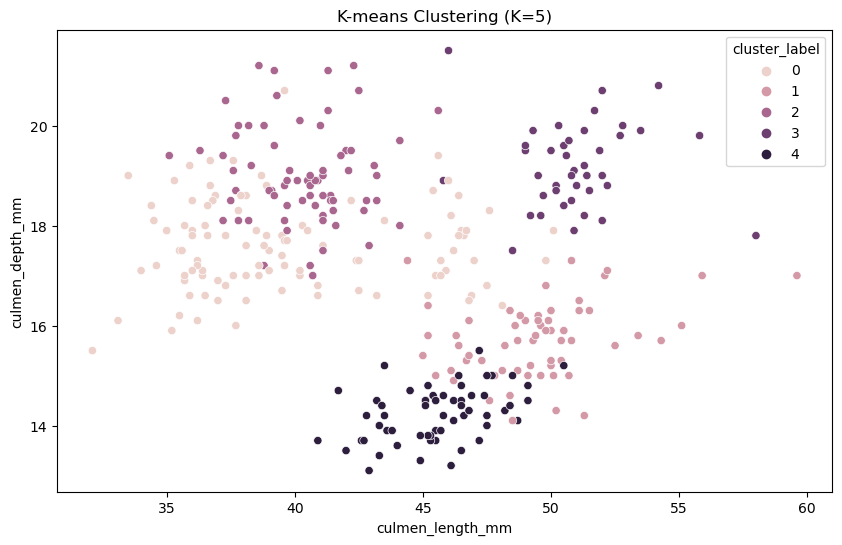

In [15]:
# Vizualizing the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=penguins_df, x='culmen_length_mm', y='culmen_depth_mm', hue='cluster_label')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

## Statistical Analysis

In [17]:
# Average values for each cluster
stat_penguins = penguins_df.groupby('cluster_label').agg(mean_culmen_length_mm = ('culmen_length_mm', 'mean'),
                                                         mean_culmen_depth_mm = ('culmen_depth_mm', 'mean'),
                                                         mean_flipper_length_mm = ('flipper_length_mm', 'mean'),
                                                         mean_body_mass_g = ('body_mass_g', 'mean')).round(2)
stat_penguins

,mean_culmen_length_mm,mean_culmen_depth_mm,mean_flipper_length_mm,mean_body_mass_g
cluster_label,,,,
0,39.74,17.59,188.86,3410.68
1,49.47,15.72,221.54,5484.84
2,40.32,19.01,192.24,4034.64
3,50.96,19.20,199.08,3920.62
4,45.56,14.24,212.71,4679.74
